<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Combinacionals_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 3

Dissenyeu  amb  multiplexors  un  circuit  que  indiqui  el  nombre  de  0s  que  hi  ha  en  les  entrades. Suposem que tenim 4 entrades y 3 sortides.

In [4]:
# @title Carregar Py4Hw { display-mode: "form" }
# @markdown Des de GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


## Disseny del circuit

Completa la següent classe amb la teva proposta de circuit.


In [19]:
class Circuit(Logic):
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, c: Wire, d: Wire,
               x2: Wire, x1: Wire, x0: Wire):
    super().__init__(parent, name)
    self.addIn("a", a)
    self.addIn("b", b)
    self.addIn("c", c)
    self.addIn("d", d)

    self.addOut("x2", x2)
    self.addOut("x1", x1)
    self.addOut("x0", x0)

    zero = self.wire("Zero")
    one = self.wire("One")
    sel = self.wire("sel", 3)

    Constant(self, "0", 0, zero)
    Constant(self, "1", 1, one)

    #El módul Concatenate ens permet unir múltiples cables en un de sol.
    # TODO: Afegeix a la llista els cables que composen la selecció del multiplexor
    Concatenate(self, "sel", [a, b, c], sel)                                  # Alumne (La llista)

    # TODO: Instancia els cables intermitjos que necessitis
    notD = self.wire("~d")                                                    # Alumne
    
    # TODO: Instancia els blocs funcionals que necesitis
    Not(self, "~d", d, notD)                                                  # Alumne

    #Mux(self, "mux(x2)", sel, [notD]+[zero]*7, x2)                            # Alumne (Correcte)
    Mux(self, "mux(x2)", sel, [notD]+[one]*5+[zero]*2, x2)                            # Alumne (Incorrecte)
    Mux(self, "mux(x1)", sel, [d, one, one, notD, one, notD, notD, zero], x1) # Alumne
    Mux(self, "mux(x0)", sel, [d, notD, notD, d, notD, d, d, notD], x0)       # Alumne


iter 4 cost: 0 False


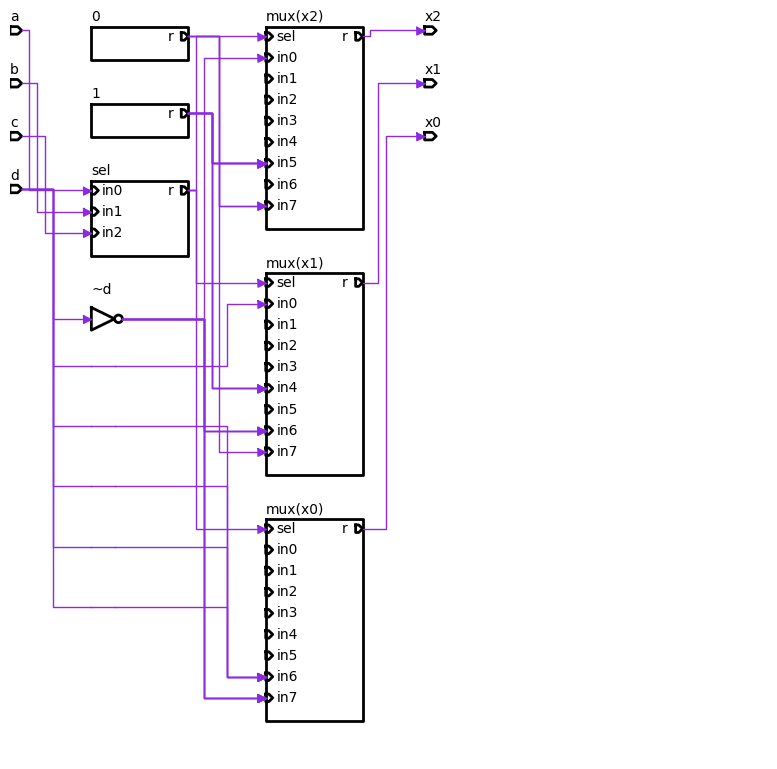

In [20]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

a = schm.wire("a", 1)
b = schm.wire("b", 1)
c = schm.wire("c", 1)
d = schm.wire("d", 1)

x2 = schm.wire("x2", 1)
x1 = schm.wire("x1", 1)
x0 = schm.wire("x0", 1)

circuit = Circuit(schm, "Circuit", a, b, c, d, x2, x1, x0)

Schematic(circuit)

In [21]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

a = test.wire("a", 1)
b = test.wire("b", 1)
c = test.wire("c", 1)
d = test.wire("d", 1)

x2 = test.wire("x2", 1)
x1 = test.wire("x1", 1)
x0 = test.wire("x0", 1)

x = test.wire("x", 3)
Concatenate(test, "x", [x2, x1, x0], x)

circuit = Circuit(test, "Circuit", a, b, c, d, x2, x1, x0)

sol = [4, 3,
       3, 2,
       3, 2,
       2, 1,
       3, 2,
       2, 1,
       2, 1,
       1, 0]

sol_w = test.wire("Solución", 3)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "a", [0]*8 + [1]*8, a)
Sequence(test, "b", [0]*4 + [1]*4 + [0]*4 + [1]*4, b)
Sequence(test, "c", [0, 0, 1, 1]*4, c)
Sequence(test, "d", [i%2 for i in range(16)], d)

wf = Waveform(test, "TEST", [a, b, c, d, x, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if x.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{x.get()}**!")
    wf.waves[x]["wave"] =  wf.waves[x]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

- **CLK 3**: ¡Se esperaba **3** y se ha obtenido **7**!

- **CLK 4**: ¡Se esperaba **2** y se ha obtenido **6**!

- **CLK 5**: ¡Se esperaba **3** y se ha obtenido **7**!

- **CLK 6**: ¡Se esperaba **2** y se ha obtenido **6**!

- **CLK 7**: ¡Se esperaba **2** y se ha obtenido **6**!

- **CLK 8**: ¡Se esperaba **1** y se ha obtenido **5**!

- **CLK 9**: ¡Se esperaba **3** y se ha obtenido **7**!

- **CLK 10**: ¡Se esperaba **2** y se ha obtenido **6**!

- **CLK 11**: ¡Se esperaba **2** y se ha obtenido **6**!

- **CLK 12**: ¡Se esperaba **1** y se ha obtenido **5**!

**10** errores encontrados.